In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Genre                   200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [4]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.set_index('CustomerID',inplace=True)

In [6]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [7]:
#the elbow method
from sklearn.cluster import KMeans

In [8]:
SSE=[]
for i in range(2,11):
    km=KMeans(n_clusters=i,max_iter=200,random_state=42)
    km.fit(df)
    SSE.append(km.inertia_)
SSE

[212889.44245524297,
 143391.5923603568,
 104414.67534220166,
 75427.71182424155,
 58348.64136331505,
 51575.27793107793,
 44359.63464114833,
 40942.511170061174,
 37515.84125504126]

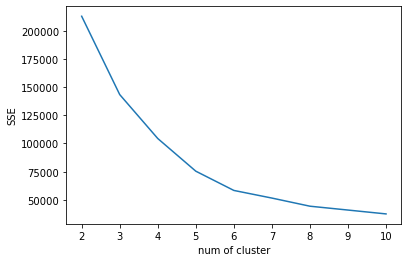

In [9]:
plt.plot(range(2,11),SSE)
plt.xlabel('num of cluster')
plt.ylabel('SSE')
plt.show()

In [10]:
#optimized on cluster==6
kmeans=KMeans(n_clusters=6,max_iter=200,random_state=42)
kmeans.fit(df)

KMeans(max_iter=200, n_clusters=6, random_state=42)

In [12]:
cluster=kmeans.labels_
cluster

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 1, 2, 1, 4,
       5, 2, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 0, 4, 0, 3, 0, 3, 0, 3, 0,
       4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [13]:
kmeans.cluster_centers_

array([[ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.44444444, 56.15555556, 53.37777778, 49.08888889],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636],
       [ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.34210526, 27.        , 56.65789474, 49.13157895],
       [ 0.38095238, 44.14285714, 25.14285714, 19.52380952]])

In [14]:
df_cluster=df.assign(clusterLabel=cluster)
df_cluster.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),clusterLabel
CustomerID,,,,,
1,1,19,15,39,5
2,1,21,15,81,2
3,0,20,16,6,5
4,0,23,16,77,2
5,0,31,17,40,5


In [15]:
df_cluster.groupby('clusterLabel').mean()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
clusterLabel,,,,
0,0.461538,32.692308,86.538462,82.128205
1,0.444444,56.155556,53.377778,49.088889
2,0.409091,25.272727,25.727273,79.363636
3,0.571429,41.685714,88.228571,17.285714
4,0.342105,27.000000,56.657895,49.131579
5,0.380952,44.142857,25.142857,19.523810


In [18]:
df_cluster.groupby('clusterLabel').size()

clusterLabel
0    39
1    45
2    22
3    35
4    38
5    21
dtype: int64

In [19]:
d=df_cluster[df_cluster['clusterLabel']==5]
d

,Genre,Age,Annual Income (k$),Spending Score (1-100),clusterLabel
CustomerID,,,,,
1,1,19,15,39,5
3,0,20,16,6,5
5,0,31,17,40,5
7,0,35,18,6,5
9,1,64,19,3,5
11,1,67,19,14,5
13,0,58,20,15,5
15,1,37,20,13,5
17,0,35,21,35,5


In [21]:
d.query('Genre==0').count()

Genre                     13
Age                       13
Annual Income (k$)        13
Spending Score (1-100)    13
clusterLabel              13
dtype: int64

In [22]:
from sklearn.metrics import silhouette_score


In [23]:
silhouette_score(df,kmeans.labels_,metric='euclidean')

0.45205475380756527

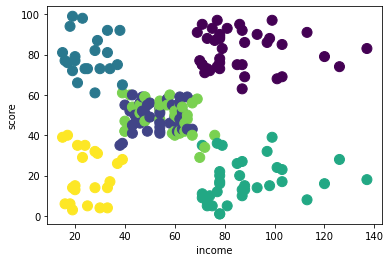

In [24]:
x=df.values
plt.scatter(x[:,2],x[:,3],c=kmeans.labels_,s=100)
plt.xlabel('income')
plt.ylabel('score')
plt.show()